# Plot Accuracy vs. Threshold for each Nutrient

goal: inform decision for selecting a justifiable accuracy threshold for each nutrient

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_acc_vs_percent(path, nutrient, max_thresh):
    df = pd.read_json(path, lines=True)
    
    mae = []
    gt = []
    for i in range(len(df)):
        mae.append(df["result"].iloc[i]["mae"])
        gt.append(df["doc"].iloc[i][nutrient])

    norm_mae = []
    # Avoid division by zero with a small epsilon
    eps = 1e-8
    for i in range(len(mae)):
        norm_mae.append(mae[i] / (gt[i] + eps))

    interval = max_thresh / 250
    thresholds = np.arange (0, max_thresh + interval, interval)
    acc = []
    for t in thresholds:
        correct = 0
        for e in norm_mae:
            correct += e < t
        acc.append(correct / len(norm_mae))

    return acc, thresholds

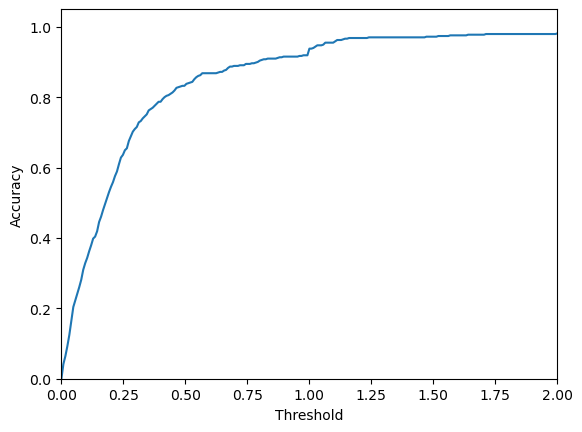

In [15]:
path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_carb_base_20250722_043618.jsonl"
max_threshold = 2

acc, thresholds = compute_acc_vs_percent(path, "carb", max_threshold)

plt.plot(thresholds, acc, label="Accuracy vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xlim(0, max_threshold)
plt.tight_layout
plt.legend
plt.show()

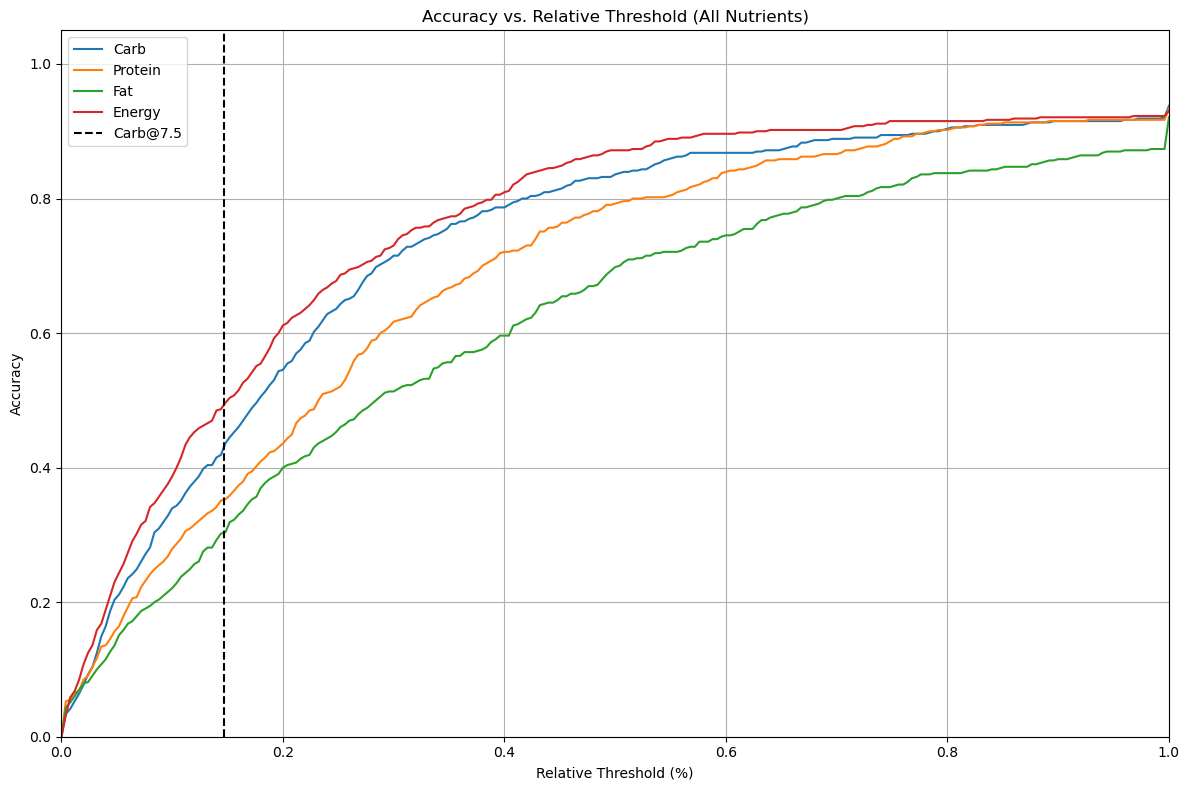

In [ ]:
files = {
    "carb": "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_carb_base_20250722_043618.jsonl",
    "protein": "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_protein_base_20250719_192710.jsonl",
    "fat": "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_fat_base_20250719_184222.jsonl",
    "energy": "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_energy_base_20250721_222318.jsonl",
}
max_thresh = 1

accs = {}
for key in files:
    acc, thresh = compute_acc_vs_percent(files[key], key, max_thresh)
    accs[key] = [acc, thresh]

plt.figure(figsize=(12, 8))

for key in accs:
    acc, thresh = accs[key]
    plt.plot(thresh, acc, label=key.capitalize())

carb_norm_thresh = 7.5 / 51.236981
plt.axvline(x=carb_norm_thresh, color='black', linestyle='--', label="Carb@7.5")

plt.xlabel("Threshold (%)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. % Threshold")
plt.ylim(0, 1.05)
plt.xlim(0, max_thresh)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Energy > Carb > Protein > Fat

Matches order of expected best to worst LLM prediction accuracy given by GPT-4o

Next, investigate constant thresholds (normalized by average gt)

In [ ]:
def compute_acc_vs_thresh(path, max_thresh):
    df = pd.read_json(path, lines=True)
    mae = []
    for r in df["result"]:
        mae.append(r["mae"])

    interval = max_thresh / 250
    thresholds = np.arange (0, max_thresh + interval, interval)
    acc = []
    for t in thresholds:
        correct = 0
        for e in mae:
            correct += e < t
        acc.append(correct / len(mae))

    return acc, thresholds

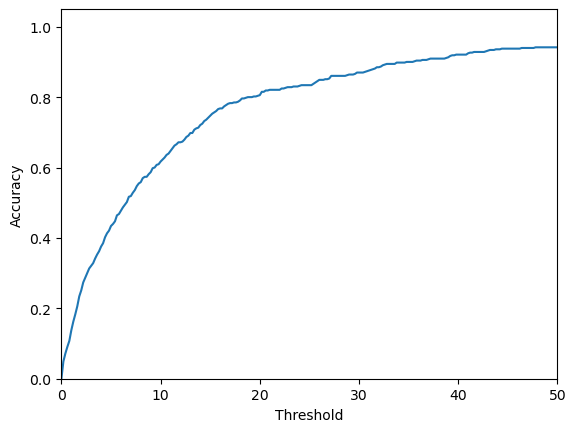

In [29]:

path = "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_carb_base_20250722_043618.jsonl"
max_threshold = 50

acc, thresholds = compute_acc_vs_thresh(path, max_threshold)

plt.plot(thresholds, acc, label="Accuracy vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xlim(0, max_threshold)
plt.tight_layout
plt.legend
plt.show()

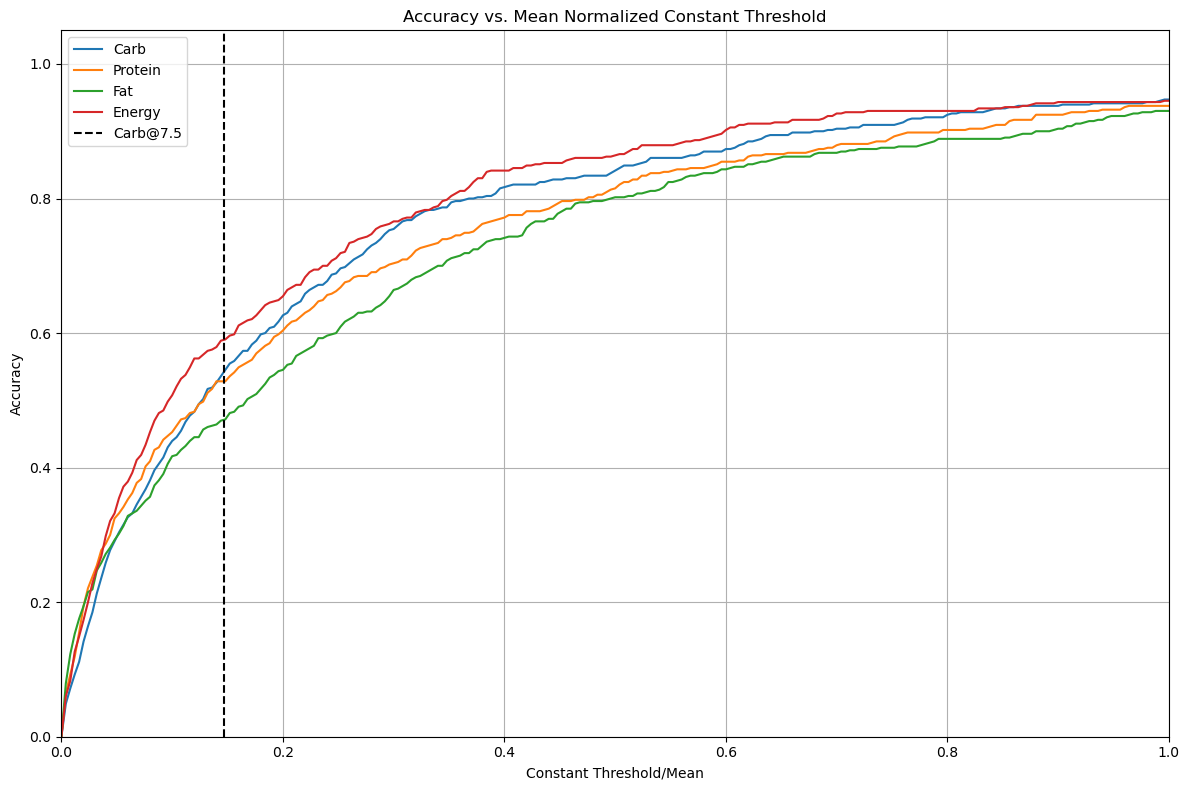

In [ ]:
files = {
    "carb": "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_carb_base_20250722_043618.jsonl",
    "protein": "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_protein_base_20250719_192710.jsonl",
    "fat": "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_fat_base_20250719_184222.jsonl",
    "energy": "/data/lucasjia/projects/nutri/results/multi-nutrient/sub1/samples_energy_base_20250721_222318.jsonl",
}

# average values in subset
max_thresh = {
    "carb": 51.236981,
    "protein": 12.143283,
    "fat": 13.454717,
    "energy": 370.127377
    }

accs = {}
for key in files:
    acc, thresh = compute_acc_vs_thresh(files[key], max_thresh[key])
    thresh = thresh / max_thresh[key]
    accs[key] = [acc, thresh]

plt.figure(figsize=(12, 8))

for key in accs:
    acc, thresh = accs[key]
    plt.plot(thresh, acc, label=key.capitalize())

carb_norm_thresh = 7.5 / 51.236981
plt.axvline(x=carb_norm_thresh, color='black', linestyle='--', label="Carb@7.5")

plt.xlabel("Threshold/Mean")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Mean Normalized Constant Threshold")
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()